In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#dataset shape
print("Shape:", df.shape)

Shape: (10000, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#dropping irrelevant column
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [7]:
#change from categorical variables to numerical
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [23]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [8]:
#target variable distribution
df['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037


Gender
0    0.5457
1    0.4543
Name: proportion, dtype: float64


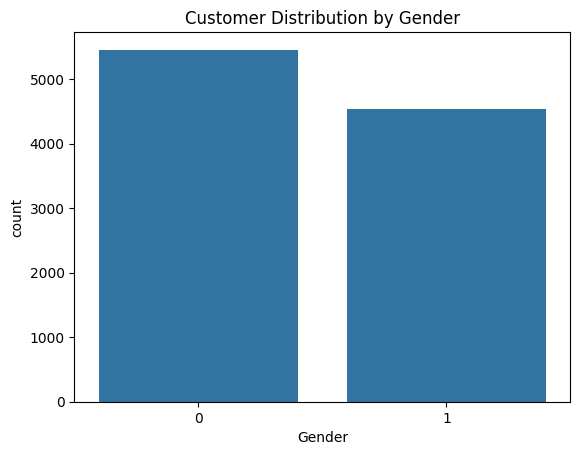

In [9]:
#distribution of gender
print(df['Gender'].value_counts(normalize=True))

sns.countplot(x='Gender', data=df)
plt.title("Customer Distribution by Gender")
plt.show()

Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64


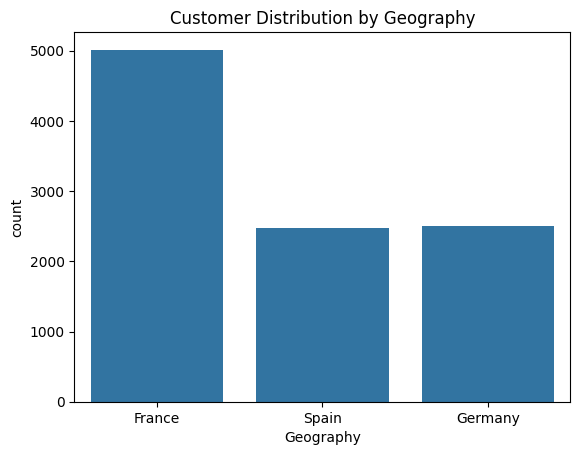

In [10]:
#distribution of geography
print(df['Geography'].value_counts(normalize=True))

sns.countplot(x='Geography', data=df)
plt.title("Customer Distribution by Geography")
plt.show()

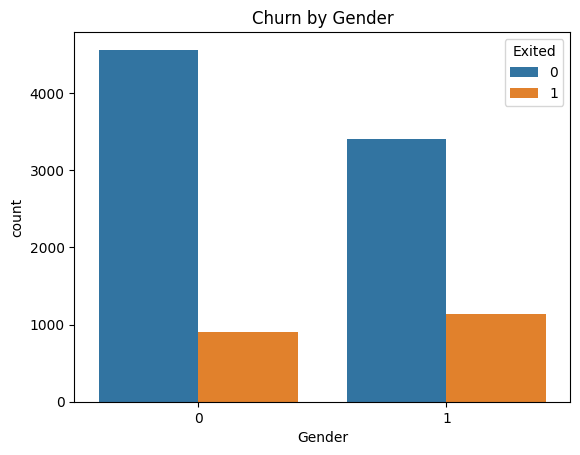

In [11]:
#gender vs exited
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title("Churn by Gender")
plt.show()

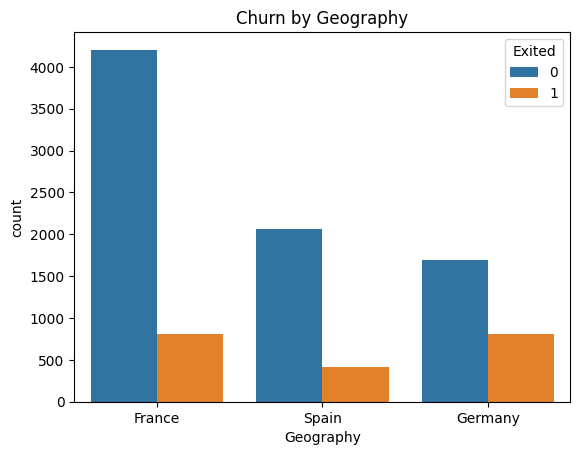

In [12]:
# geography vs exited
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title("Churn by Geography")
plt.show()

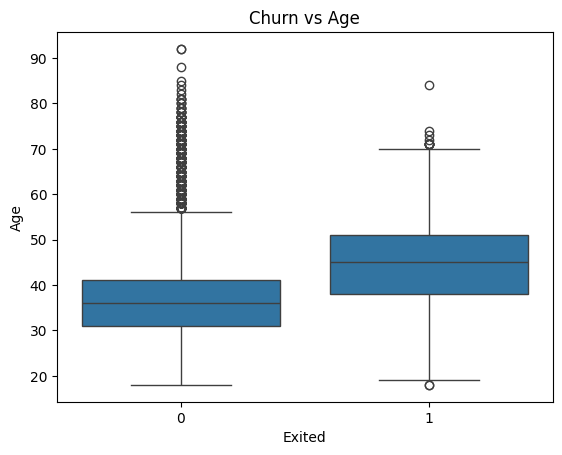

In [13]:
#age vs exited
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Churn vs Age")
plt.show()

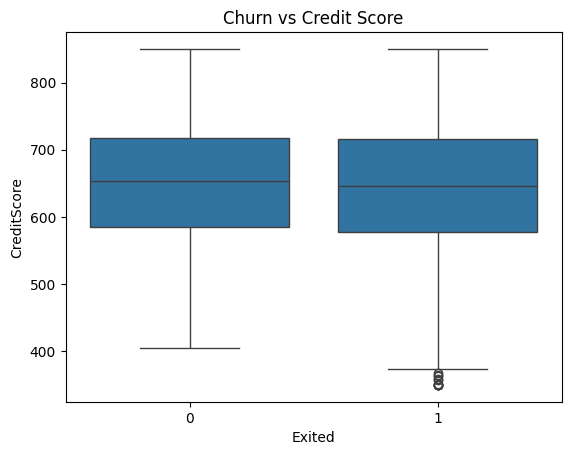

In [14]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title("Churn vs Credit Score")
plt.show()

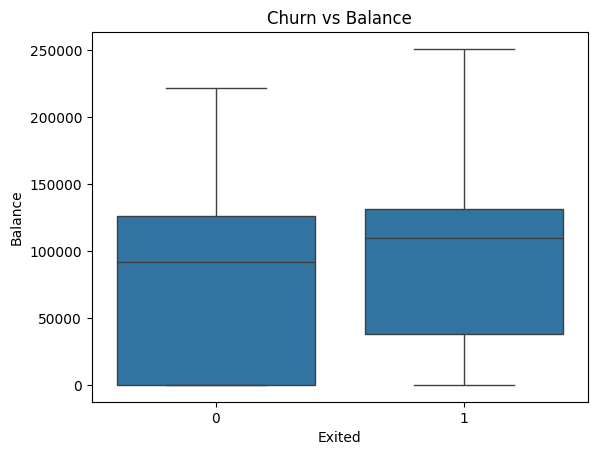

In [15]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Churn vs Balance")
plt.show()

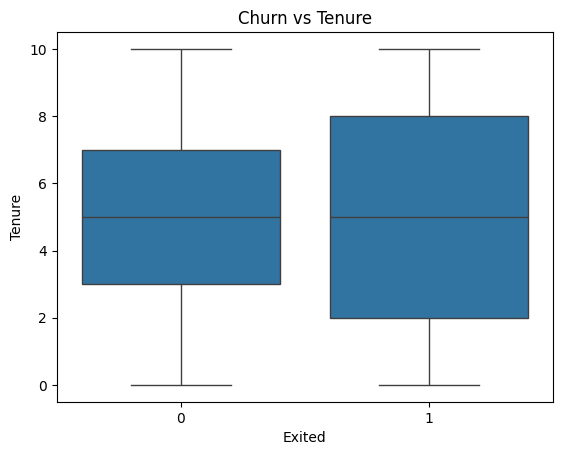

In [16]:
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title("Churn vs Tenure")
plt.show()

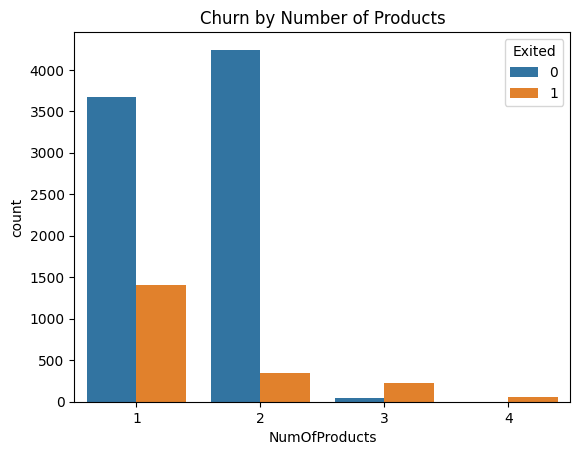

In [17]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title("Churn by Number of Products")
plt.show()

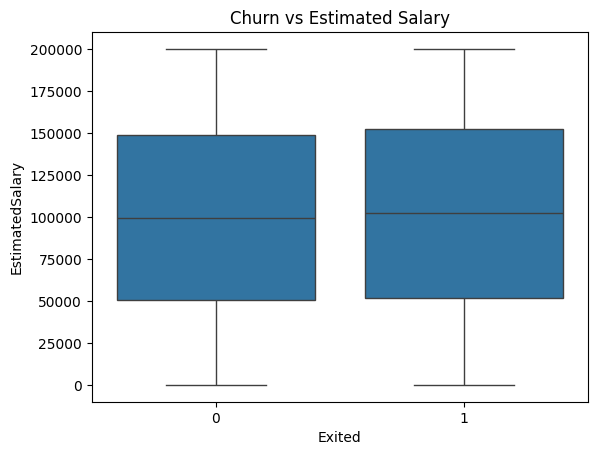

In [18]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title("Churn vs Estimated Salary")
plt.show()

Correlation with Exited (churn):
Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


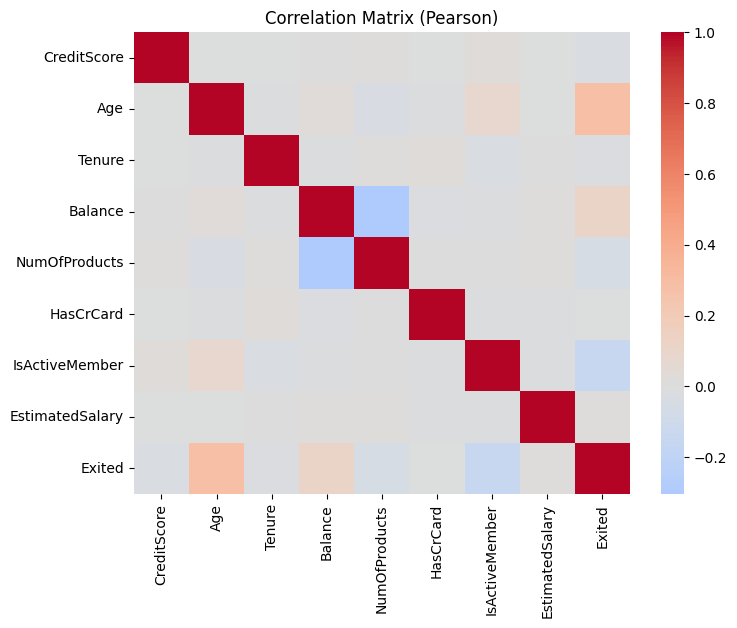

In [19]:
# linear relationship of the numeric features with exited (the target variable)
num_cols = [
    'CreditScore','Age','Tenure','Balance',
    'NumOfProducts','HasCrCard','IsActiveMember',
    'EstimatedSalary','Exited'
]
corr = df[num_cols].corr(method='pearson')

print("Correlation with Exited (churn):")
print(corr['Exited'].sort_values(ascending=False))

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Pearson)')
plt.show()


In [20]:
#feature scaling
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance',
                 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,1,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,-0.440036,Spain,1,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,-1.536794,France,1,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,0.501521,France,1,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,2.063884,Spain,1,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


In [21]:
#split the model into train and test set
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8000, 10)
Test shape: (2000, 10)


In [26]:
print(X_train.head())
print(X_train.dtypes)


      CreditScore Geography  Gender       Age    Tenure   Balance  \
2151     1.060247    France       0  1.723821  0.687130 -1.225848   
8392     0.915392   Germany       0 -0.660018 -0.695982  0.410973   
5006     1.080940   Germany       1 -0.183251 -1.733315  0.599083   
4117    -0.926334    France       0 -0.183251 -0.004426 -1.225848   
7182     0.429093   Germany       0  0.960993  0.341352  0.545796   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
2151      -0.911583          1               0         1.032643  
8392      -0.911583          1               0        -0.627897  
5006       0.807737          1               1         0.300934  
4117       0.807737          1               0        -0.295561  
7182       0.807737          0               1         0.128379  
CreditScore        float64
Geography           object
Gender               int64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64


In [44]:
print(X.columns)


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')


In [28]:
# After you finish encoding categorical variables and scaling
# You should have something like:
# X_train, X_test, y_train, y_test = ...

# Now build and train
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[1544   63]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [29]:
# Build model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[1562   45]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.80      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.87      0.87      0.86      2000



              Feature  Importance
2                 Age    0.254389
4             Balance    0.140073
8     EstimatedSalary    0.138384
0         CreditScore    0.133942
5       NumOfProducts    0.130920
3              Tenure    0.081053
7      IsActiveMember    0.037963
9   Geography_Germany    0.028973
1              Gender    0.021337
6           HasCrCard    0.018459
10    Geography_Spain    0.014507


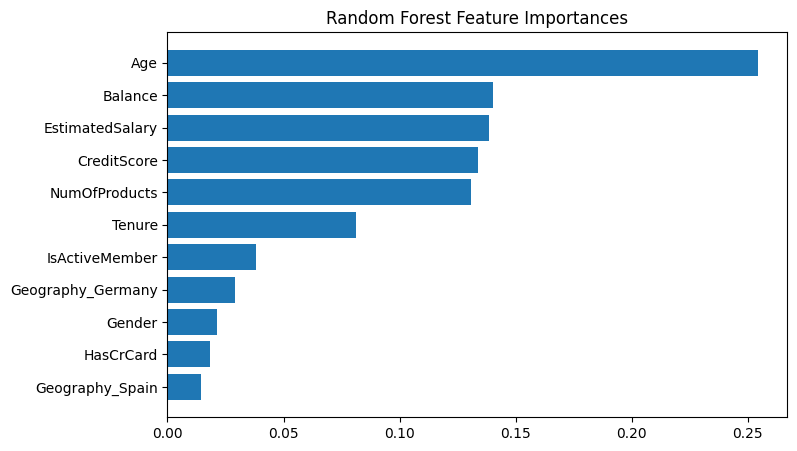

In [30]:
# Get feature importances
importances = rf.feature_importances_
features = X_train.columns

# Put into a DataFrame for neatness
feat_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importances)

# Plot top features
plt.figure(figsize=(8,5))
plt.barh(feat_importances['Feature'], feat_importances['Importance'])
plt.gca().invert_yaxis()  # highest at top
plt.title("Random Forest Feature Importances")
plt.show()

ROC-AUC Score: 0.860010513798569


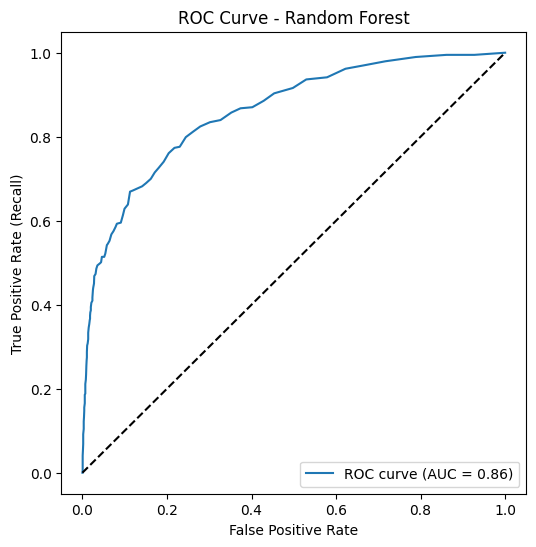

In [31]:

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = rf.predict_proba(X_test)[:,1]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

In [32]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

proba = rf.predict_proba(X_test)[:, 1]

#Evaluate a range of thresholds
thresholds = np.round(np.linspace(0.10, 0.90, 17), 2)

rows = []
for t in thresholds:
    y_pred = (proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average='binary', zero_division=0
    )
    rows.append([t, precision, recall, f1, fp, fn, tp, tn])

thr_table = pd.DataFrame(rows, columns=['threshold','precision','recall','f1','FP','FN','TP','TN'])

# View options by different goals
print("\nTop by recall (catch more churners):")
print(thr_table.sort_values('recall', ascending=False).head(10))

print("\nTop by F1 (balance precision & recall):")
print(thr_table.sort_values('f1', ascending=False).head(10))


Top by recall (catch more churners):
   threshold  precision    recall        f1   FP   FN   TP    TN
0       0.10   0.327491  0.903308  0.480704  729   38  355   878
1       0.15   0.385965  0.839695  0.528846  525   63  330  1082
2       0.20   0.451852  0.776081  0.571161  370   88  305  1237
3       0.25   0.505396  0.715013  0.592202  275  112  281  1332
4       0.30   0.580220  0.671756  0.622642  191  129  264  1416
5       0.35   0.615789  0.595420  0.605433  146  159  234  1461
6       0.40   0.678125  0.552163  0.608696  103  176  217  1504
7       0.45   0.731884  0.513995  0.603886   74  191  202  1533
8       0.50   0.788136  0.473282  0.591415   50  207  186  1557
9       0.55   0.811881  0.417303  0.551261   38  229  164  1569

Top by F1 (balance precision & recall):
    threshold  precision    recall        f1   FP   FN   TP    TN
4        0.30   0.580220  0.671756  0.622642  191  129  264  1416
6        0.40   0.678125  0.552163  0.608696  103  176  217  1504
5       

In [33]:
y_pred_thr = (proba >= 0.30).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thr)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_thr))

Confusion Matrix:
 [[1416  191]
 [ 129  264]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1607
           1       0.58      0.67      0.62       393

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000



In [34]:
pip install shap


In [35]:
import shap
import shap

# Build explainer (stick with default "raw")
explainer = shap.TreeExplainer(rf)

# Get SHAP values
shap_values = explainer.shap_values(X_test)


In [36]:
print(len(shap_values))        # should be 2 → one for class 0, one for class 1
print(shap_values[1].shape)

2000
(11, 2)


In [37]:
print(type(shap_values))
print(len(shap_values))  # should be 2 (class 0, class 1)
print(shap_values[1].shape, X_test.shape)


<class 'numpy.ndarray'>
2000
(11, 2) (2000, 11)


In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [38]:
print(X_test.dtypes)


CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_Germany       bool
Geography_Spain         bool
dtype: object


In [39]:
X_test_num = X_test.astype(float)
X_train_num = X_train.astype(float)


100%|===================| 3990/4000 [04:32<00:00]       

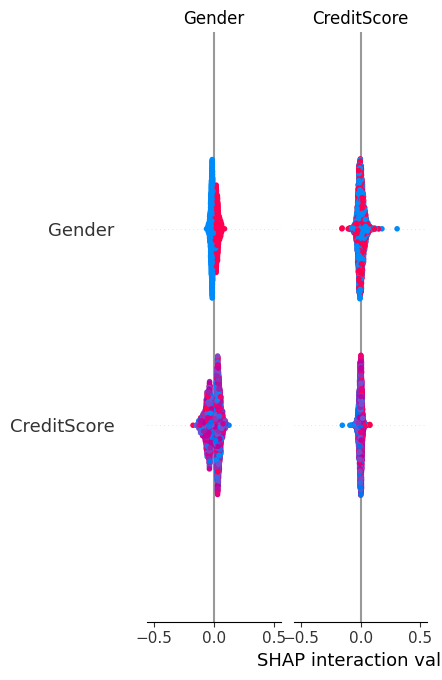

In [40]:
explainer = shap.Explainer(rf, X_train_num)
shap_values = explainer(X_test_num, check_additivity=False)

shap.summary_plot(shap_values, X_test_num, plot_type="bar", feature_names=X_test.columns)


100%|===================| 3987/4000 [04:20<00:00]       

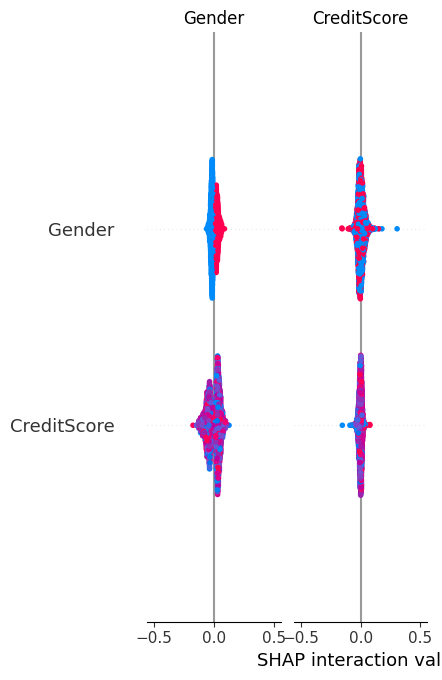

In [41]:
import shap

# Explainer with check_additivity disabled
explainer = shap.Explainer(rf, X_train_num)
shap_values = explainer(X_test_num, check_additivity=False)

# Global bar plot (average importance)
shap.summary_plot(
    shap_values.values,        # ensure using values, not interactions
    X_test_num,
    feature_names=X_test.columns,
    plot_type="bar"
)


In [52]:
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define numeric and categorical features
numeric_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
categorical_features = ["Gender", "HasCrCard", "IsActiveMember"]


# Preprocessor: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# Build pipeline: preprocessing + classifier
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Fit pipeline
clf.fit(X_train, y_train)

# ✅ Save pipeline directly (no separate dict)
joblib.dump(clf, "model.joblib")

['model.joblib']